In [131]:
from scipy.stats import bernoulli
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
data_bern = bernoulli.rvs(size=1000,p=0.999)

In [138]:
thetas = np.linspace(0,1,100)
CP = []
q = [scipy.stats.norm.ppf(0.975), scipy.stats.norm.ppf(0.995)]

for i in range(len(q)):
    CP.append([])
    for theta in thetas:
        _CP = 0
        for _ in range(1000):
            data_bern = bernoulli.rvs(size=50,p=theta)
            theta_hat = data_bern.mean()
            sigma_hat = np.sqrt(theta_hat * (1 - theta_hat)/len(data_bern))
            if (theta_hat - q[i]*sigma_hat <= theta and  theta_hat + q[i]*sigma_hat >= theta):
                _CP += 1
        _CP /= float(1000)
        CP[i].append(_CP)



<Figure size 720x648 with 0 Axes>

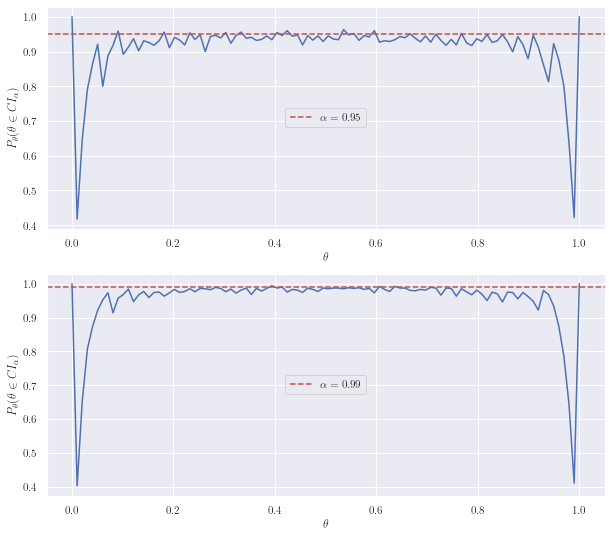

In [139]:
plt.rcParams["figure.figsize"] = (10, 9)
plt.rcParams['text.usetex'] = True
plt.figure()
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(thetas, CP[0])
ax1.axhline(y = 0.95, color = 'r', linestyle = 'dashed', label=r"$\alpha = 0.95$")
ax1.set_xlabel(r"$\theta$")
ax1.set_ylabel(r"$P_{\theta}(\theta \in CI_{\alpha})$")
ax1.legend(loc ='center')

ax2.plot(thetas, CP[1])
ax2.axhline(y = 0.99, color = 'r', linestyle = 'dashed', label=r"$\alpha = 0.99$")
ax2.set_xlabel(r"$\theta$")
ax2.set_ylabel(r"$P_{\theta}(\theta \in CI_{\alpha})$")
ax2.legend(loc ='center')

## Observation:
The binary data yield a discrete number of successes from a
discrete number of trials, n. This discreteness results in
actual coverage probabilities that oscillate with the n for
fixed values of p (and with p for fixed n).